# EDA

## 데이터 준비

In [1]:
import os
import pandas as pd

ROOT_DIR = '.'
DATA_PATH = os.path.join(ROOT_DIR, 'data', 'delivery_raw.csv')

data = pd.read_csv(DATA_PATH, sep='\t')
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [144]:
# To plot pretty figures
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, 'images')

os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + '.' + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')

## 데이터 레이블 만들기

In [145]:
df = data.copy()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [147]:
# describe about numeric feature
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [148]:
# null 값 확인
df.isnull().sum(axis=0)

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift                                   16262
total_busy                                      16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [149]:
# drop actual_delivery_time isnull value
# make created_at, actual_delivery_time to datetime
# label = actual_delivery_time - created_time
df = df.drop(df.index[df['actual_delivery_time'].isnull()], axis=0)

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df['label'] = (pd.DatetimeIndex(df['actual_delivery_time']) - pd.DatetimeIndex(df['created_at'])).total_seconds()
# df.drop(['actual_delivery_time'], axis=1, inplace=True)

In [150]:
df['label'].describe()

count    1.974210e+05
mean     2.908257e+03
std      1.922961e+04
min      1.010000e+02
25%      2.104000e+03
50%      2.660000e+03
75%      3.381000e+03
max      8.516859e+06
Name: label, dtype: float64

75%의 값이 3381인데 반면 max의 값이 8516859으로 상당히 차이가 있음  
300000 이상 걸리는 데이터를 이상치로 판단

In [151]:
df.drop(df[df['label'] > 300000].index, axis=0, inplace=True)

In [152]:
# label 값이 20000 이하인 df
df_under_2e4 = df[df['label'] < 20000]

Saving figure attribute_df_plots


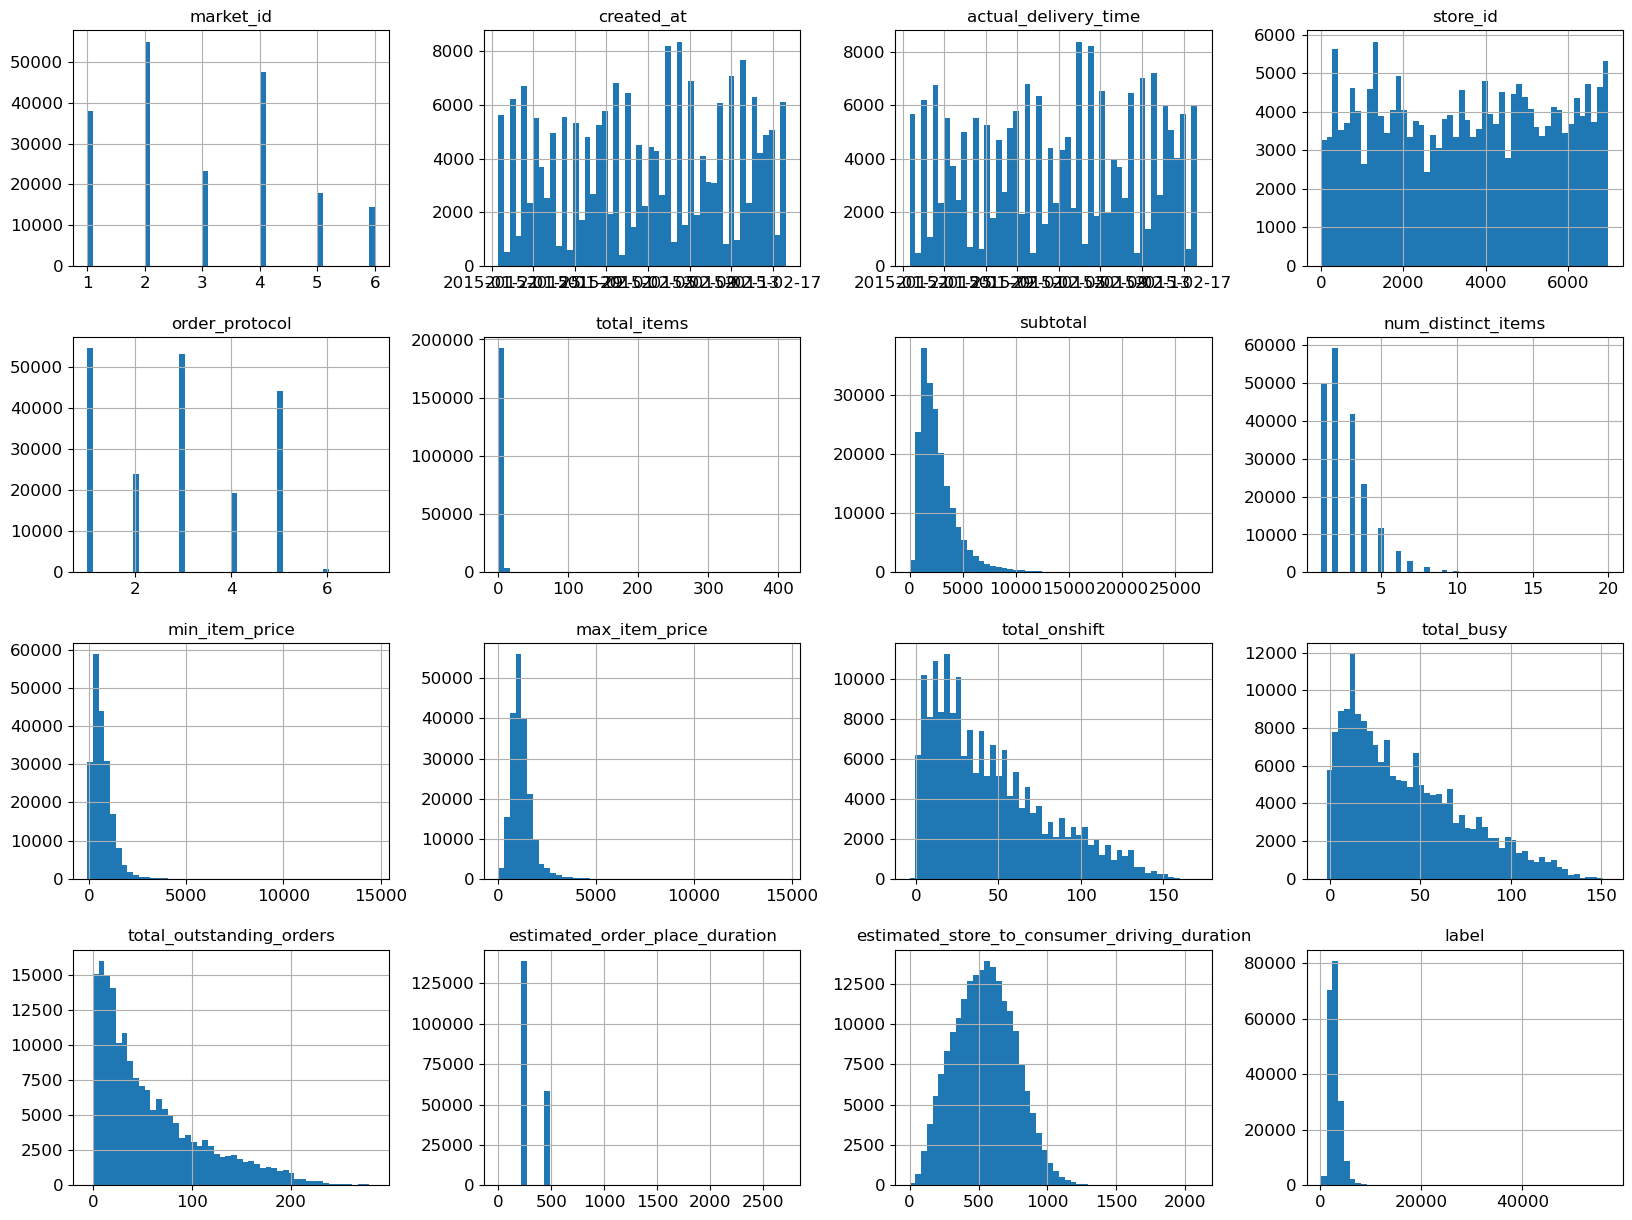

In [153]:
df.hist(bins=50, figsize=(20, 15))
save_fig("attribute_df_plots")
plt.show()

## market_id

In [154]:
# market_id unique value
df['market_id'].value_counts(), df['market_id'].unique()

(2.0    55055
 4.0    47596
 1.0    38035
 3.0    23296
 5.0    17999
 6.0    14450
 Name: market_id, dtype: int64,
 array([ 1.,  2.,  3.,  4., nan,  5.,  6.]))

Saving figure catplot_label_margket_id


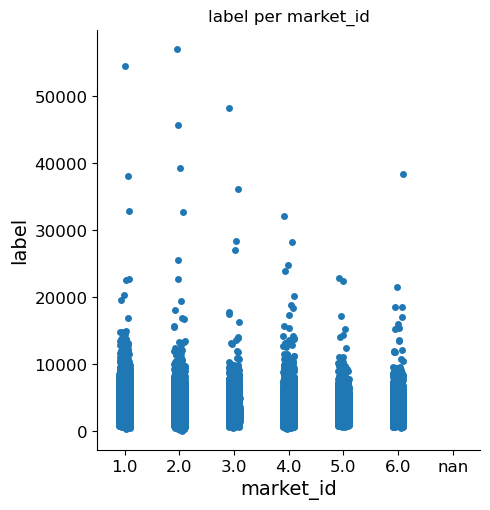

In [155]:
sns.catplot(data=df, x='market_id', y='label')
plt.title('label per market_id')
save_fig('catplot_label_margket_id')
plt.show()

Saving figure catplot_label_margket_id_under_20000


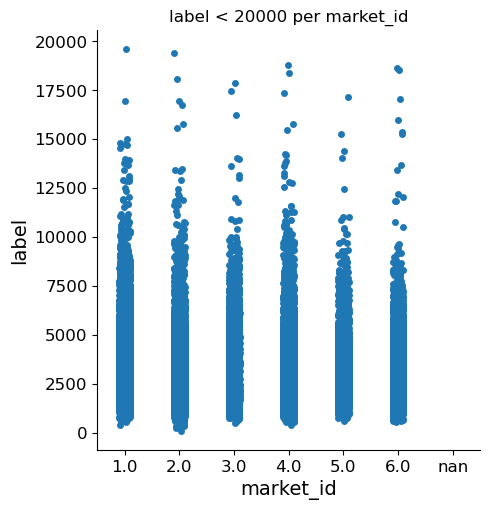

In [156]:
# label이 0 ~ 20000 인 데이터 확인
sns.catplot(data=df_under_2e4, x='market_id', y='label')
plt.title('label < 20000 per market_id')
save_fig('catplot_label_margket_id_under_20000')
plt.show()

## created_at

In [157]:
df['created_at'].sort_values()

43519    2015-01-21 15:22:03
148754   2015-01-21 15:31:51
187014   2015-01-21 15:39:16
10265    2015-01-21 15:40:42
188797   2015-01-21 15:41:33
                 ...        
176616   2015-02-18 05:57:51
100474   2015-02-18 05:58:07
191692   2015-02-18 05:59:01
168114   2015-02-18 05:59:23
61787    2015-02-18 06:00:44
Name: created_at, Length: 197418, dtype: datetime64[ns]

In [158]:
df['actual_delivery_time'].sort_values()

187014   2015-01-21 15:58:11
148754   2015-01-21 16:16:34
43519    2015-01-21 16:17:43
155462   2015-01-21 16:22:11
34079    2015-01-21 16:22:29
                 ...        
118706   2015-02-18 07:04:49
146706   2015-02-18 07:06:33
39347    2015-02-18 07:07:47
121411   2015-02-18 07:16:27
79089    2015-02-18 07:35:20
Name: actual_delivery_time, Length: 197418, dtype: datetime64[ns]

In [159]:
df['season'] = df['created_at'].dt.month
df['season'].value_counts()

2    128937
1     68481
Name: season, dtype: int64

In [160]:
df.drop(['season'], axis=1, inplace=True)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,label
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [161]:
df['time'] = df['created_at'].dt.hour
df['time'].value_counts().sort_index()

0     12669
1     28187
2     36972
3     27068
4     15250
5      7095
6      1416
7        11
8         1
14       40
15      538
16     2109
17     3413
18     5100
19    13541
20    15560
21    11464
22     8821
23     8163
Name: time, dtype: int64

Saving figure catplot_label_per_hour


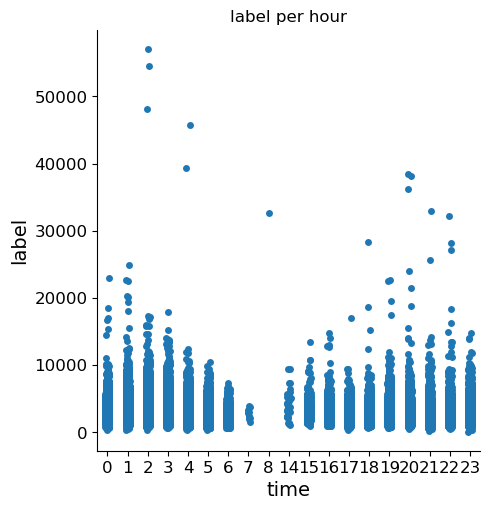

In [162]:
sns.catplot(df, x='time', y='label')
plt.title('label per hour')
save_fig('catplot_label_per_hour')
plt.show()

**created_at insite**

계절같은경우 데이터가 1월 2월만 있으므로 필요없음

시간대의 경우 19 - 00, 01 - 03, 04-18 비슷함

## store_id

In [163]:
df['store_id'].value_counts().sort_index()

1         8
2         5
3         3
4       136
5         1
       ... 
6983     24
6984      4
6985      2
6986     39
6987      2
Name: store_id, Length: 6743, dtype: int64

In [164]:
df['store_id'].value_counts()

6865    937
1311    863
314     814
1686    765
3937    721
       ... 
1258      1
974       1
4260      1
6426      1
1845      1
Name: store_id, Length: 6743, dtype: int64

Saving figure catplot_label_per_store_id


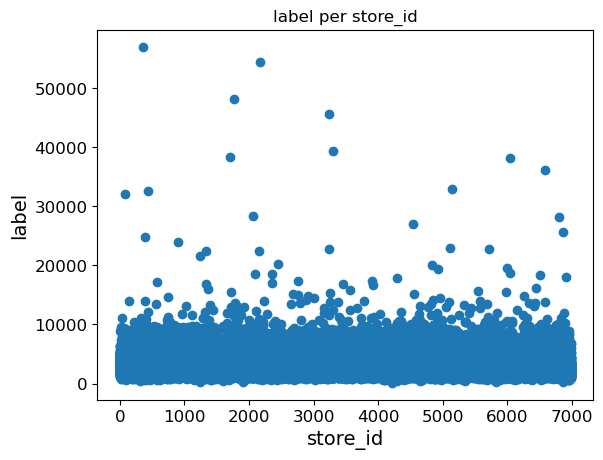

In [165]:
plt.scatter(df['store_id'], df['label'])
plt.title('label per store_id')
plt.xlabel('store_id')
plt.ylabel('label')
save_fig('catplot_label_per_store_id')
plt.show()

Saving figure catplot_label_under_20000_per_store_id


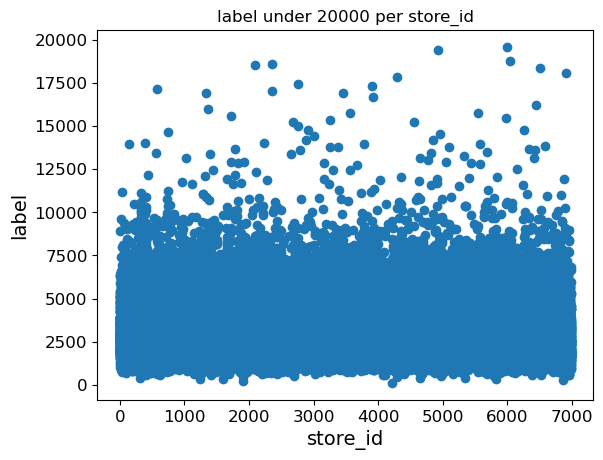

In [166]:
plt.scatter(df_under_2e4['store_id'], df_under_2e4['label'])
plt.title('label under 20000 per store_id')
plt.xlabel('store_id')
plt.ylabel('label')
save_fig('catplot_label_under_20000_per_store_id')
plt.show()

In [174]:
mean_per_store_id = df[['label', 'store_id']].groupby(by='store_id').mean()
mean_per_store_id

,label
store_id,
1,2580.500000
2,2183.400000
3,2711.333333
4,3088.720588
5,2529.000000
...,...
6983,3538.833333
6984,3401.750000
6985,3887.500000


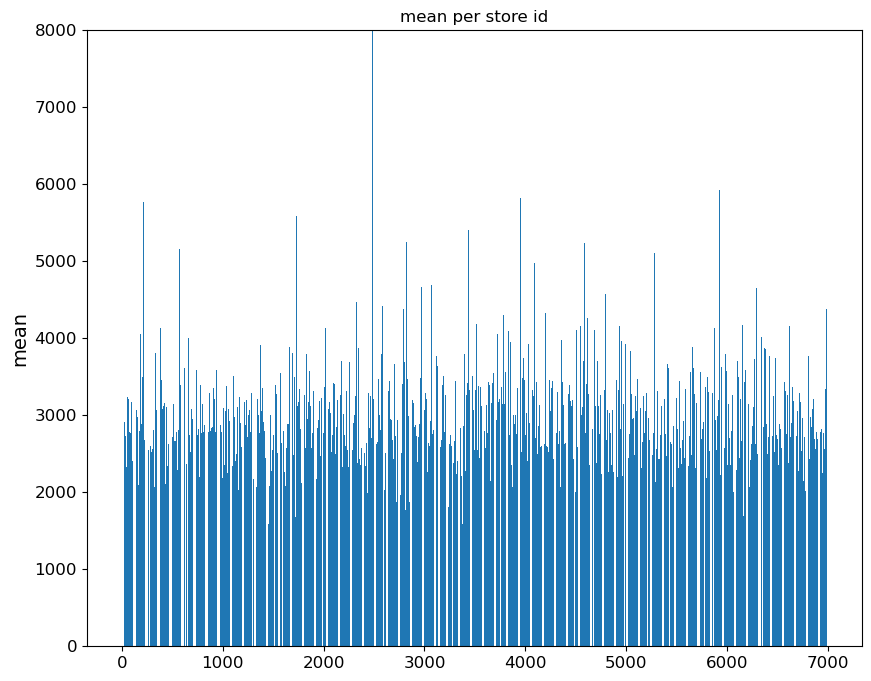

In [198]:
plt.figure(figsize=(10, 8))
plt.bar(mean_per_store_id.index, mean_per_store_id['label'])
plt.title('mean per store id')
plt.ylabel('mean')
plt.ylim(ymax=8000)
plt.show()

## store_primary_category

In [56]:
# 상위 20개의 요리 카테고리
categories = df['store_primary_category'].value_counts()
categories

american             19399
pizza                17320
mexican              17098
burger               10958
sandwich             10059
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 74, dtype: int64

Saving figure bar_label_per_store_category_top_10


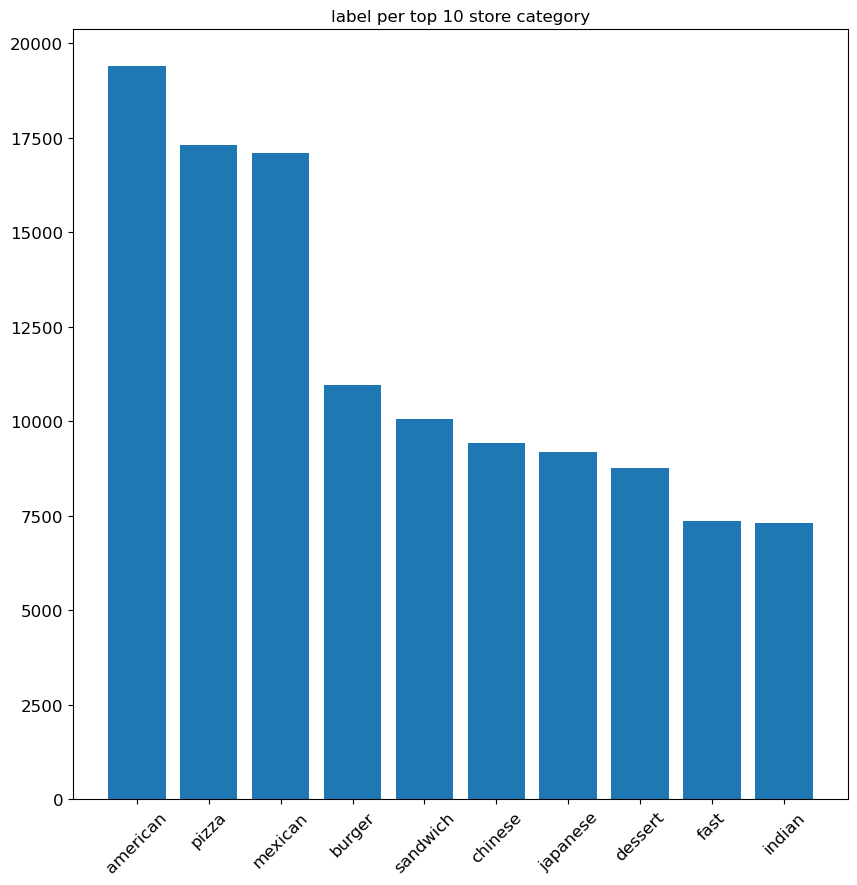

In [82]:
plt.figure(figsize=(10,10))
plt.bar(categories[:10].index, categories[:10])
plt.title('label per top 10 store category')
plt.xticks(rotation=45)
save_fig('bar_label_per_store_category_top_10')
plt.show()

Saving figure catplot_label_per_store_cat_top_20


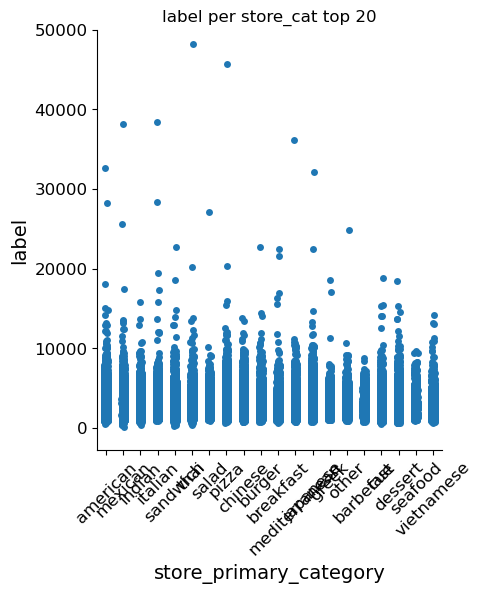

In [83]:
sns.catplot(df[df['store_primary_category'].isin(categories[:20].index)], x='store_primary_category', y='label')
plt.title('label per store_cat top 20')
plt.ylim(ymax=50000)
plt.xticks(rotation=45)
save_fig('catplot_label_per_store_cat_top_20')
plt.show()

Saving figure catplot_label_per_store_cat_20-40


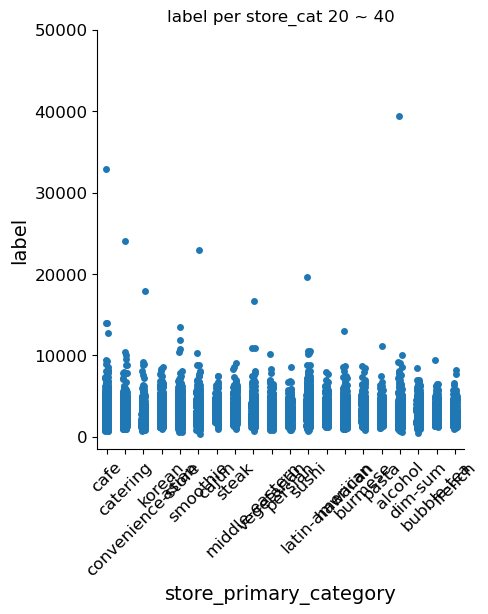

In [84]:
sns.catplot(df[df['store_primary_category'].isin(categories[20:40].index)], x='store_primary_category', y='label')
plt.xticks(rotation=45)
plt.ylim(ymax=50000)
plt.title('label per store_cat 20 ~ 40')
save_fig('catplot_label_per_store_cat_20-40')
plt.show()

Saving figure catplot_label_per_store_cat_40-60


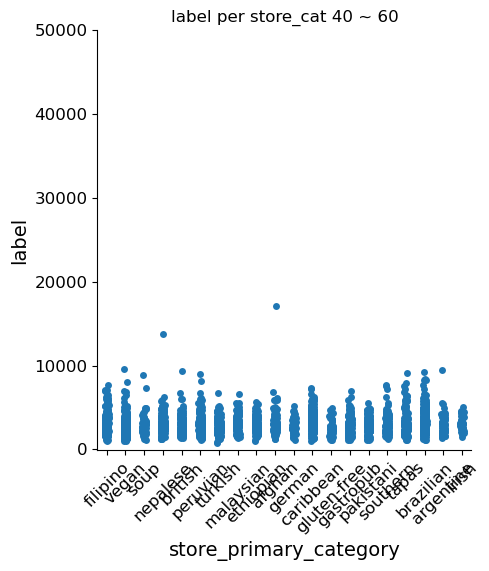

In [85]:
sns.catplot(df[df['store_primary_category'].isin(categories[40:60].index)], x='store_primary_category', y='label')
plt.title('label per store_cat 40 ~ 60')
plt.ylim(ymax=50000)
plt.xticks(rotation=45)
save_fig('catplot_label_per_store_cat_40-60')
plt.show()

Saving figure catplot_label_per_store_cat_under60


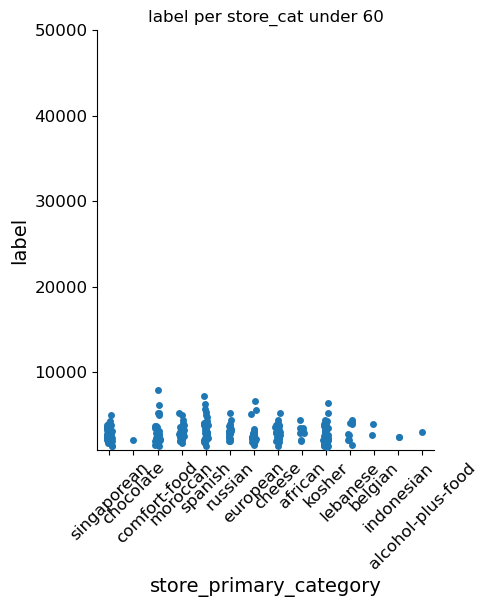

In [86]:
sns.catplot(df[df['store_primary_category'].isin(categories[60:].index)], x='store_primary_category', y='label')
plt.title('label per store_cat under 60')
plt.ylim(ymax=50000)
plt.xticks(rotation=45)
save_fig('catplot_label_per_store_cat_under60')
plt.show()

## order_protocol

In [87]:
val_cnt_protocol = df['order_protocol'].value_counts()

Saving figure bar_distribution_order_protocol


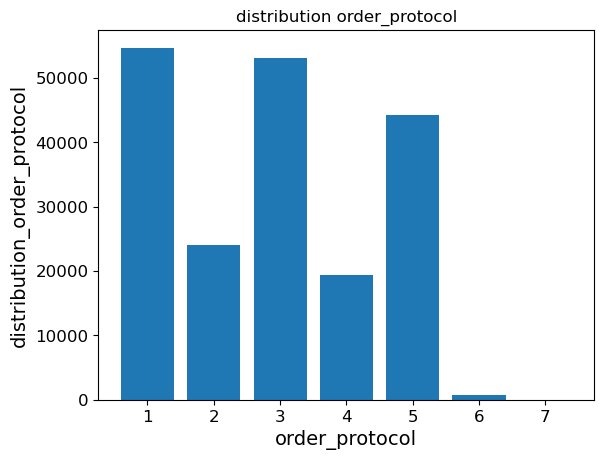

In [91]:
plt.bar(val_cnt_protocol.index, val_cnt_protocol)
plt.title('distribution order_protocol')
plt.xlabel('order_protocol')
plt.ylabel('distribution_order_protocol')
save_fig('bar_distribution_order_protocol')
plt.show()

Saving figure catplot_label_per_order_protocol


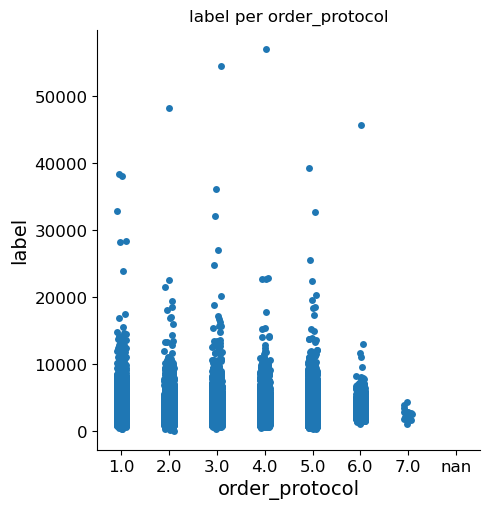

In [92]:
sns.catplot(df, x='order_protocol', y='label')
plt.title('label per order_protocol')
save_fig('catplot_label_per_order_protocol')
plt.show()

## total_items

In [94]:
val_cnt_items = df['total_items'].value_counts().sort_index()
val_cnt_items

1      40617
2      55133
3      39250
4      25136
5      14054
6       8618
7       5023
8       3050
9       1860
10      1284
11       832
12       674
13       405
14       328
15       226
16       186
17       140
18       114
19        70
20        65
21        54
22        38
23        18
24        36
25        36
26        30
27        18
28        19
29        14
30        15
31         5
32         4
33         6
34         8
35         7
36         4
37         3
38         2
39         3
40         4
41         2
42         7
43         1
44         1
45         1
47         1
48         4
49         2
50         2
51         1
56         1
57         1
59         1
64         1
66         1
84         1
411        1
Name: total_items, dtype: int64

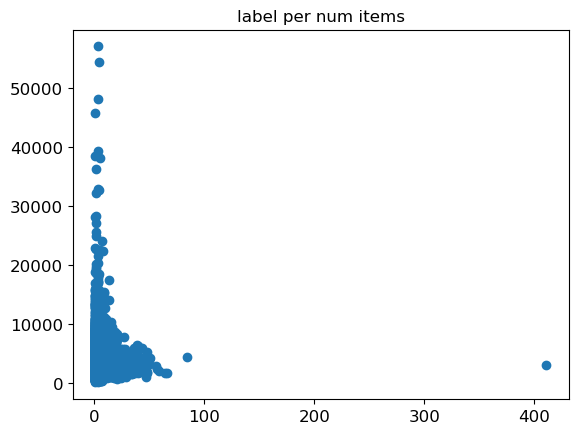

In [95]:
plt.scatter(df['total_items'], df['label'])
plt.title('label per num items')
plt.show()

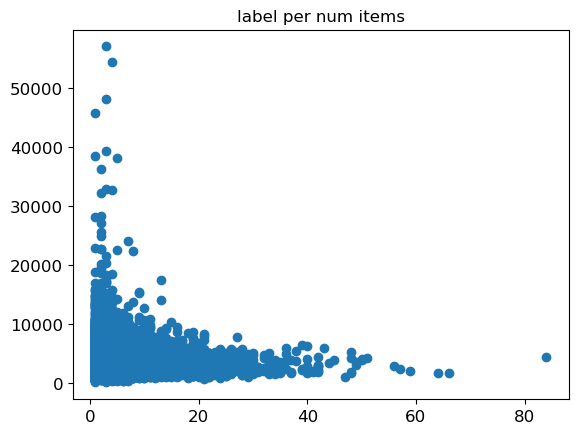

In [96]:
df.drop(df[df['total_items'] == df['total_items'].max()].index, axis=0, inplace=True)

plt.scatter(df['total_items'], df['label'])
plt.title('label per num items')
plt.show()

/tmp/ipykernel_15475/236765128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under_2e4.drop(df_under_2e4[df_under_2e4['total_items'] == df_under_2e4['total_items'].max()].index, axis=0, inplace=True)


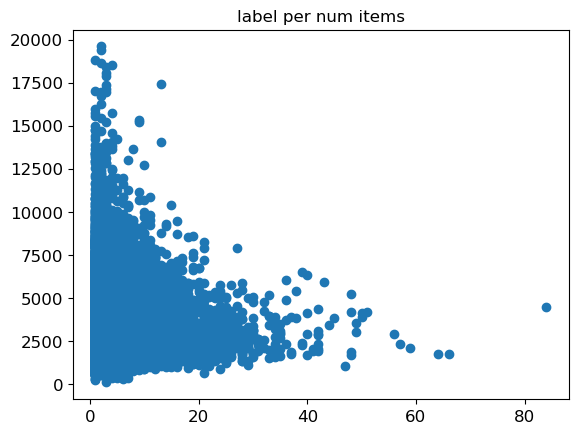

In [97]:
df_under_2e4.drop(df_under_2e4[df_under_2e4['total_items'] == df_under_2e4['total_items'].max()].index, axis=0, inplace=True)

plt.scatter(df_under_2e4['total_items'], df_under_2e4['label'])
plt.title('label per num items')
plt.show()

411개의 item을 주문한 경우를 이상치로 판단

## subtotal

In [98]:
df['subtotal'].describe()

count    197417.000000
mean       2682.323437
std        1823.113901
min           0.000000
25%        1400.000000
50%        2200.000000
75%        3395.000000
max       27100.000000
Name: subtotal, dtype: float64

In [99]:
df[df['subtotal'] == 0]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,label,time
1070,4.0,2015-01-25 17:28:32,2015-01-25 18:03:00,517,american,3.0,7,0,7,295,1225,6.0,22.0,8.0,251,241.0,2068.0,17
1837,2.0,2015-02-07 17:25:00,2015-02-07 17:55:00,6740,fast,4.0,5,0,2,169,200,19.0,13.0,13.0,251,512.0,1800.0,17
3947,1.0,2015-01-31 01:42:46,2015-01-31 02:06:18,414,japanese,3.0,2,0,2,405,1395,16.0,16.0,16.0,251,200.0,1412.0,1
4240,1.0,2015-02-12 19:15:20,2015-02-12 19:49:09,490,breakfast,3.0,1,0,1,1495,1495,16.0,16.0,20.0,251,556.0,2029.0,19
7035,6.0,2015-02-16 02:20:18,2015-02-16 03:08:54,1025,thai,3.0,3,0,3,995,1295,NaN,NaN,NaN,251,870.0,2916.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190853,1.0,2015-01-28 02:21:37,2015-01-28 03:02:12,2169,indian,3.0,5,0,5,350,1195,51.0,53.0,62.0,251,478.0,2435.0,2
192276,4.0,2015-02-08 04:23:01,2015-02-08 06:00:42,5956,filipino,1.0,2,0,2,625,963,5.0,6.0,16.0,446,513.0,5861.0,4
192751,1.0,2015-01-26 03:54:50,2015-01-26 04:27:15,440,burger,3.0,5,0,3,800,1800,38.0,39.0,39.0,251,365.0,1945.0,3
193233,5.0,2015-02-14 02:34:45,2015-02-14 04:05:37,5020,latin-american,1.0,1,0,1,1200,1200,26.0,24.0,41.0,446,568.0,5452.0,2


가격이 75%가 3395임에 반해 max가 27100으로 이상치가 존재할 것으로 예상

또한 가격이 0인 값들도 존재

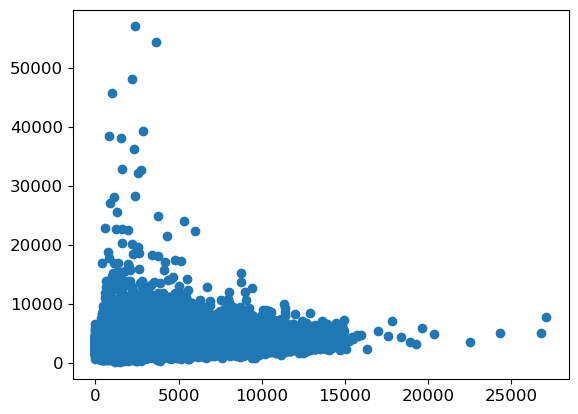

In [100]:
plt.scatter(df['subtotal'], df['label'])
plt.show()

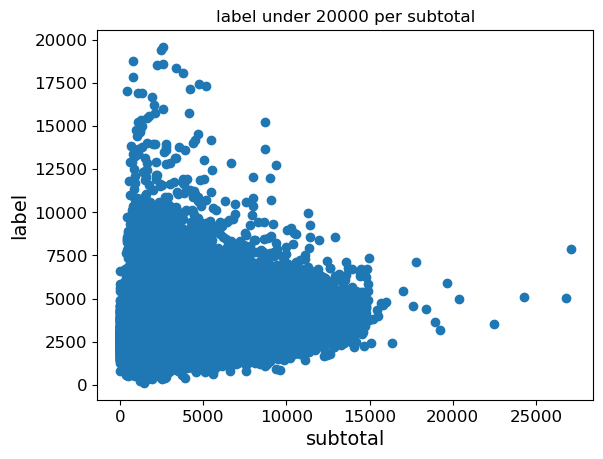

In [101]:
plt.scatter(df_under_2e4['subtotal'], df_under_2e4['label'])
plt.title('label under 20000 per subtotal')
plt.xlabel('subtotal')
plt.ylabel('label')
plt.show()

## num_distinct_items

In [102]:
df['num_distinct_items'].describe()

count    197417.000000
mean          2.670768
std           1.630262
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: num_distinct_items, dtype: float64

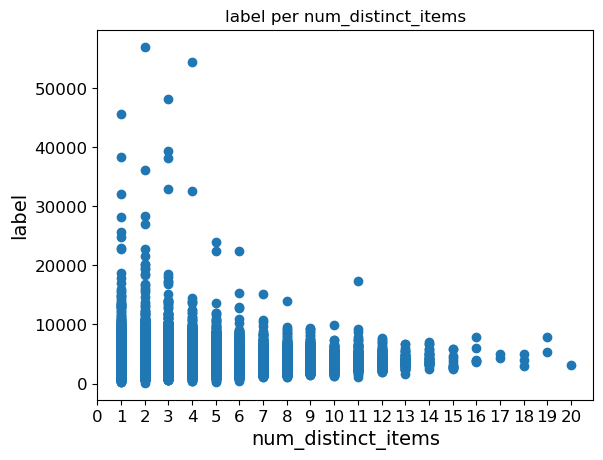

In [103]:
plt.scatter(df['num_distinct_items'], df['label'])
plt.title('label per num_distinct_items')
plt.xlabel('num_distinct_items')
plt.ylabel('label')
plt.xticks(range(0, 21, 1))
plt.show()

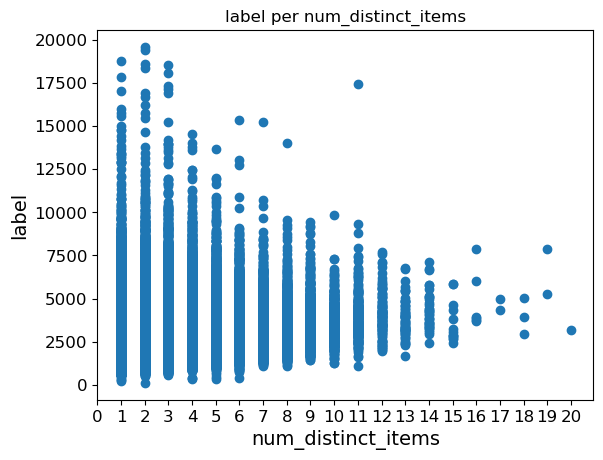

In [104]:
plt.scatter(df_under_2e4['num_distinct_items'], df_under_2e4['label'])
plt.title('label per num_distinct_items')
plt.xlabel('num_distinct_items')
plt.ylabel('label')
plt.xticks(range(0, 21, 1))
plt.show()

**num_distinct_items**

선형적인 관계가 보임

## min_item_price

In [105]:
df['min_item_price'].describe()

count    197417.000000
mean        686.224266
std         522.041541
min         -86.000000
25%         299.000000
50%         595.000000
75%         949.000000
max       14700.000000
Name: min_item_price, dtype: float64

In [106]:
df[df['min_item_price'] < 0]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,label,time
790,1.0,2015-01-29 02:59:28,2015-01-29 03:44:09,132,fast,4.0,3,1003,3,-86,1066,24.0,29.0,38.0,251,721.0,2681.0,2
1351,2.0,2015-02-06 05:26:55,2015-02-06 06:15:41,6740,fast,4.0,35,1786,4,-1,488,33.0,36.0,52.0,251,587.0,2926.0,5
46369,2.0,2015-02-08 23:20:59,2015-02-08 23:50:03,777,fast,4.0,25,1636,5,-35,514,81.0,61.0,72.0,251,469.0,1744.0,23
46378,2.0,2015-02-08 06:02:12,2015-02-08 06:32:58,777,fast,4.0,15,1822,4,-48,433,36.0,36.0,43.0,251,339.0,1846.0,6
77238,5.0,2015-02-14 22:01:48,2015-02-14 23:15:15,2276,pizza,3.0,1,3099,1,-31,52,22.0,26.0,34.0,251,377.0,4407.0,22
91319,3.0,2015-02-15 20:46:57,2015-02-15 21:43:42,707,american,4.0,16,1601,5,-13,194,29.0,17.0,22.0,251,875.0,3405.0,20
104173,3.0,2015-01-25 19:18:20,2015-01-25 20:37:08,1950,breakfast,3.0,7,6095,7,-30,1211,18.0,23.0,12.0,251,878.0,4728.0,19
119785,1.0,2015-01-24 03:45:37,2015-01-24 04:42:59,2998,fast,4.0,10,1938,8,-9,594,28.0,40.0,46.0,251,551.0,3442.0,3
119854,1.0,2015-02-10 03:31:22,2015-02-10 04:02:08,2054,italian,5.0,5,2585,3,-7,1235,49.0,47.0,59.0,251,333.0,1846.0,3
165821,2.0,2015-02-02 20:24:15,2015-02-02 20:55:06,86,fast,4.0,18,1646,3,-6,297,49.0,41.0,37.0,251,638.0,1851.0,20


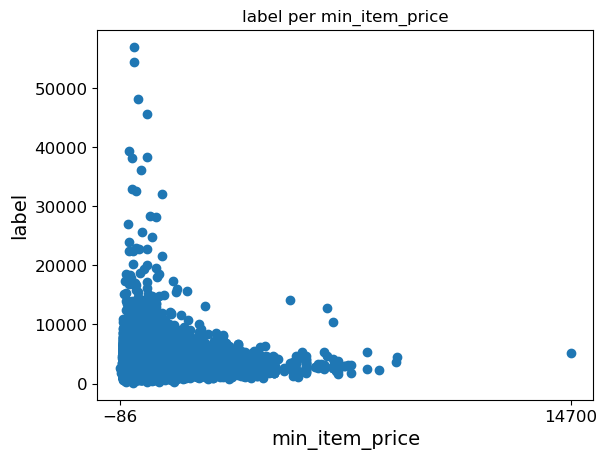

In [107]:
plt.scatter(df['min_item_price'], df['label'])
plt.xticks([df['min_item_price'].min(), df['min_item_price'].max()])
plt.title('label per min_item_price')
plt.xlabel('min_item_price')
plt.ylabel('label')
plt.show()

## max_item_price

In [108]:
df['max_item_price'].describe()

count    197417.000000
mean       1159.591454
std         558.415082
min           0.000000
25%         800.000000
50%        1095.000000
75%        1395.000000
max       14700.000000
Name: max_item_price, dtype: float64

In [109]:
df[df['max_item_price'] == 0]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,label,time
20220,1.0,2015-02-09 18:23:31,2015-02-09 19:31:54,959,mexican,1.0,1,575,1,0,0,7.0,8.0,9.0,446,352.0,4103.0,18
20222,1.0,2015-01-22 17:57:08,2015-01-22 18:54:37,959,mexican,1.0,1,575,1,0,0,11.0,5.0,4.0,446,350.0,3449.0,17
20225,1.0,2015-02-13 18:41:31,2015-02-13 19:30:39,959,mexican,1.0,1,575,1,0,0,12.0,12.0,15.0,446,376.0,2948.0,18
20227,1.0,2015-01-21 19:36:57,2015-01-21 20:23:45,959,mexican,1.0,1,560,1,0,0,19.0,20.0,29.0,446,519.0,2808.0,19
20228,1.0,2015-02-13 02:37:10,2015-02-13 03:13:44,959,dim-sum,5.0,1,595,1,0,0,61.0,59.0,75.0,446,548.0,2194.0,2
78076,5.0,2015-01-27 02:26:45,2015-01-27 02:56:56,2276,pizza,3.0,1,2418,1,0,0,43.0,41.0,36.0,251,495.0,1811.0,2
87613,1.0,2015-01-21 19:50:42,2015-01-21 20:24:07,2432,sandwich,1.0,2,1090,2,0,0,21.0,21.0,31.0,446,377.0,2005.0,19


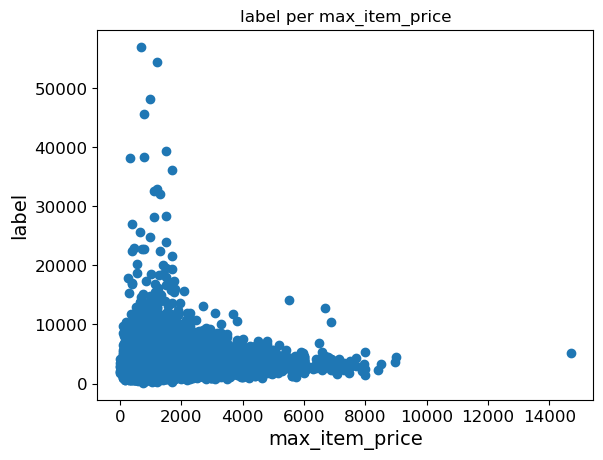

In [110]:
plt.scatter(df['max_item_price'], df['label'])
plt.title('label per max_item_price')
plt.xlabel('max_item_price')
plt.ylabel('label')
plt.show()

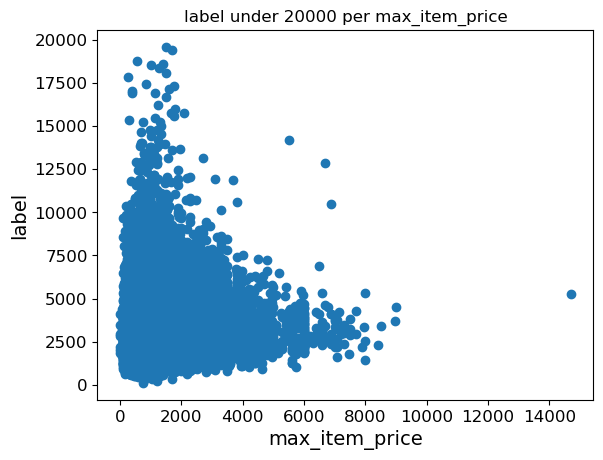

In [111]:
plt.scatter(df_under_2e4['max_item_price'], df_under_2e4['label'])
plt.title('label under 20000 per max_item_price')
plt.xlabel('max_item_price')
plt.ylabel('label')
plt.show()

## 지역 상황 속성

In [203]:
df['total_onshift'].describe()

count    181157.000000
mean         44.806963
std          34.525884
min          -4.000000
25%          17.000000
50%          37.000000
75%          65.000000
max         171.000000
Name: total_onshift, dtype: float64

In [204]:
(df['total_onshift'] < 0).sum()

21

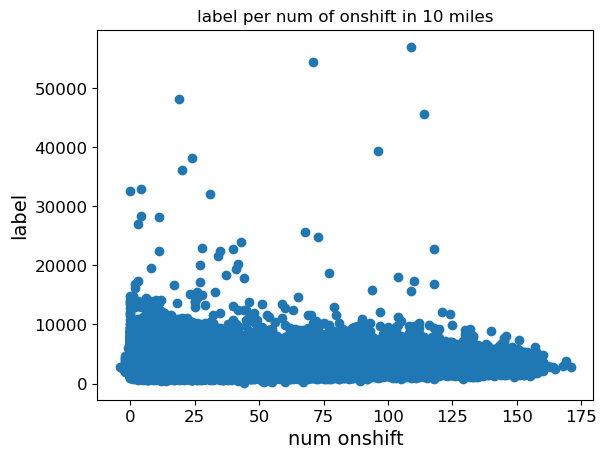

In [205]:
plt.scatter(df['total_onshift'], df['label'])
plt.title('label per num of onshift in 10 miles')
plt.xlabel('num onshift')
plt.ylabel('label')
plt.show()

In [206]:
df['total_busy'].describe()

count    181157.000000
mean         41.738873
std          32.145132
min          -5.000000
25%          15.000000
50%          34.000000
75%          62.000000
max         154.000000
Name: total_busy, dtype: float64

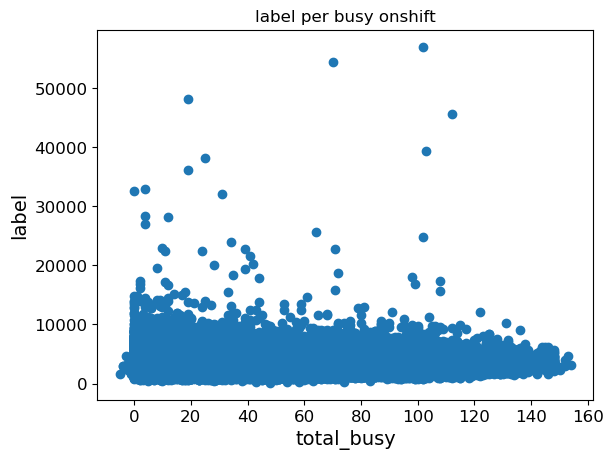

In [207]:
plt.scatter(df['total_busy'], df['label'])
plt.title('label per busy onshift')
plt.xlabel('total_busy')
plt.ylabel('label')
plt.show()

In [208]:
# 근처 배달 직원이 음수인 경우와 근처 바쁜 직원의 수가 음수인 경우 제거
# df.drop(df[(df['total_onshift'] < 0) | (df['total_busy'] < 0)].index, axis=0, inplace=True)

In [209]:
((df['total_onshift'] - df['total_busy']) < 0).sum() / len(df['total_busy'])

0.2046115349157625

In [210]:
df['onshift'] = df['total_onshift'] - df['total_busy']
df['onshift'][df['onshift'] < 0 ] = 0
df['onshift'].describe()

/tmp/ipykernel_15475/3344617734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onshift'][df['onshift'] < 0 ] = 0


count    181157.000000
mean          4.846746
std           8.706213
min           0.000000
25%           0.000000
50%           1.000000
75%           6.000000
max          86.000000
Name: onshift, dtype: float64

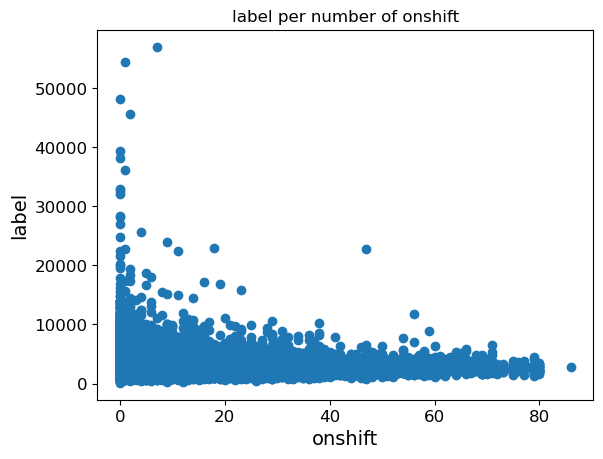

In [120]:
plt.scatter(df['onshift'], df['label'])
plt.title('label per number of onshift')
plt.xlabel('onshift')
plt.ylabel('label')
plt.show()

In [121]:
df['total_outstanding_orders'].describe()

count    181156.000000
mean         58.048141
std          52.660185
min          -6.000000
25%          17.000000
50%          41.000000
75%          85.000000
max         285.000000
Name: total_outstanding_orders, dtype: float64

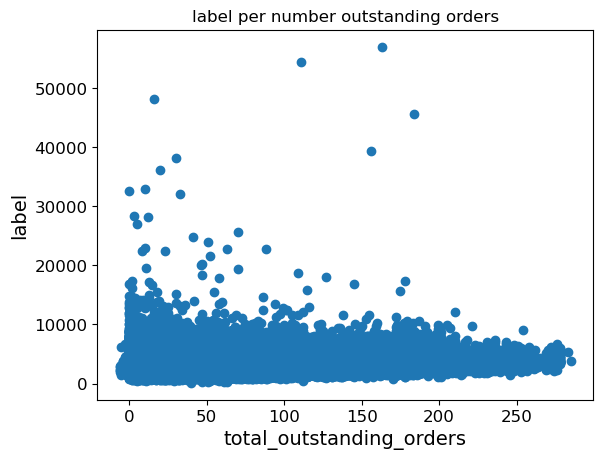

In [122]:
plt.scatter(df['total_outstanding_orders'], df['label'])
plt.title('label per number outstanding orders')
plt.xlabel('total_outstanding_orders')
plt.ylabel('label')
plt.show()

- total_onshift, total_busy
  1. totla_onshift - total_busy 음수인 경우를 0으로 만듬

-  total_outstanding_orders 음수인 경우 제거

## 다른 모델들의 예측값

In [123]:
df['estimated_order_place_duration'].describe()

count    197417.000000
mean        308.560423
std          90.139828
min           0.000000
25%         251.000000
50%         251.000000
75%         446.000000
max        2715.000000
Name: estimated_order_place_duration, dtype: float64

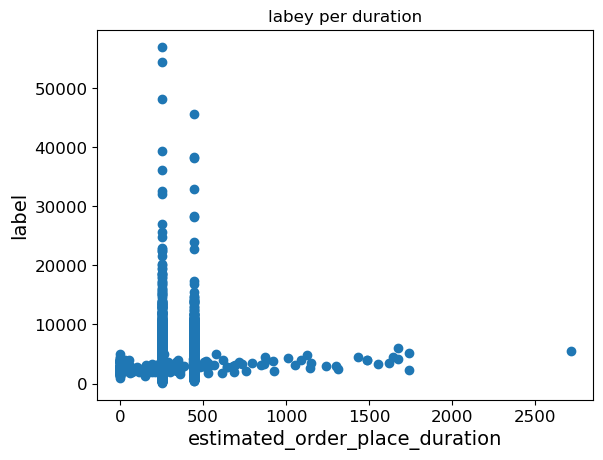

In [124]:
plt.scatter(df['estimated_order_place_duration'], df['label'])
plt.title('labey per duration')
plt.xlabel('estimated_order_place_duration')
plt.ylabel('label')
plt.show()

In [125]:
df['estimated_store_to_consumer_driving_duration'].describe()

count    196891.000000
mean        545.356852
std         219.355365
min           0.000000
25%         382.000000
50%         544.000000
75%         702.000000
max        2088.000000
Name: estimated_store_to_consumer_driving_duration, dtype: float64

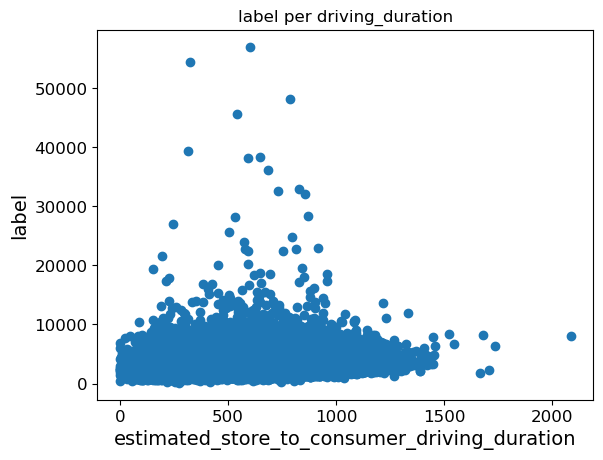

In [126]:
plt.scatter(df['estimated_store_to_consumer_driving_duration'], df['label'])
plt.title('label per driving_duration')
plt.xlabel('estimated_store_to_consumer_driving_duration')
plt.ylabel('label')
plt.show()

## total

In [211]:
numerical_columns = ['label',
                     'market_id', 'time', 'store_id', 
                     'order_protocol', 'total_items', 'subtotal',
                     'num_distinct_items', 'min_item_price', 'max_item_price',
                     'onshift', 'total_outstanding_orders',
                     'estimated_order_place_duration',
                     'estimated_store_to_consumer_driving_duration']

numeric_df = df[numerical_columns]

df_corr = numeric_df.corr().sort_values('label', ascending=False)
df_corr

,label,market_id,time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,onshift,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
label,1.000000,-0.046679,-0.157897,-0.010265,-0.066059,0.111225,0.204296,0.147834,0.014760,0.126095,-0.074963,0.173695,0.097435,0.223309
estimated_store_to_consumer_driving_duration,0.223309,0.006614,-0.023272,0.001964,-0.008307,0.004673,0.034637,0.022673,0.003373,0.026576,0.024938,0.039747,-0.024415,1.000000
subtotal,0.204296,-0.016223,-0.184383,-0.013360,-0.053610,0.558061,1.000000,0.681098,0.037040,0.505544,0.057361,0.130072,0.039029,0.034637
total_outstanding_orders,0.173695,0.063780,-0.361796,-0.020301,0.134948,0.034346,0.130072,0.067769,0.041013,0.130667,0.303621,1.000000,-0.172482,0.039747
num_distinct_items,0.147834,0.002551,-0.114262,-0.012721,-0.023338,0.763905,0.681098,1.000000,-0.448737,0.041872,0.034134,0.067769,0.003498,0.022673
max_item_price,0.126095,-0.004896,-0.186416,-0.018657,-0.090947,-0.058235,0.505544,0.041872,0.545481,1.000000,0.053971,0.130667,0.085271,0.026576
total_items,0.111225,-0.006861,-0.066468,-0.008783,0.008796,1.000000,0.558061,0.763905,-0.393145,-0.058235,0.016867,0.034346,-0.023655,0.004673
estimated_order_place_duration,0.097435,-0.053233,-0.027801,0.017478,-0.678216,-0.023655,0.039029,0.003498,0.053056,0.085271,-0.070667,-0.172482,1.000000,-0.024415
min_item_price,0.014760,-0.000126,-0.050574,-0.009135,-0.045399,-0.393145,0.037040,-0.448737,1.000000,0.545481,0.012516,0.041013,0.053056,0.003373
store_id,-0.010265,0.017301,0.010111,1.000000,0.019543,-0.008783,-0.013360,-0.012721,-0.009135,-0.018657,-0.002997,-0.020301,0.017478,0.001964


Saving figure scatter_matrix_plot


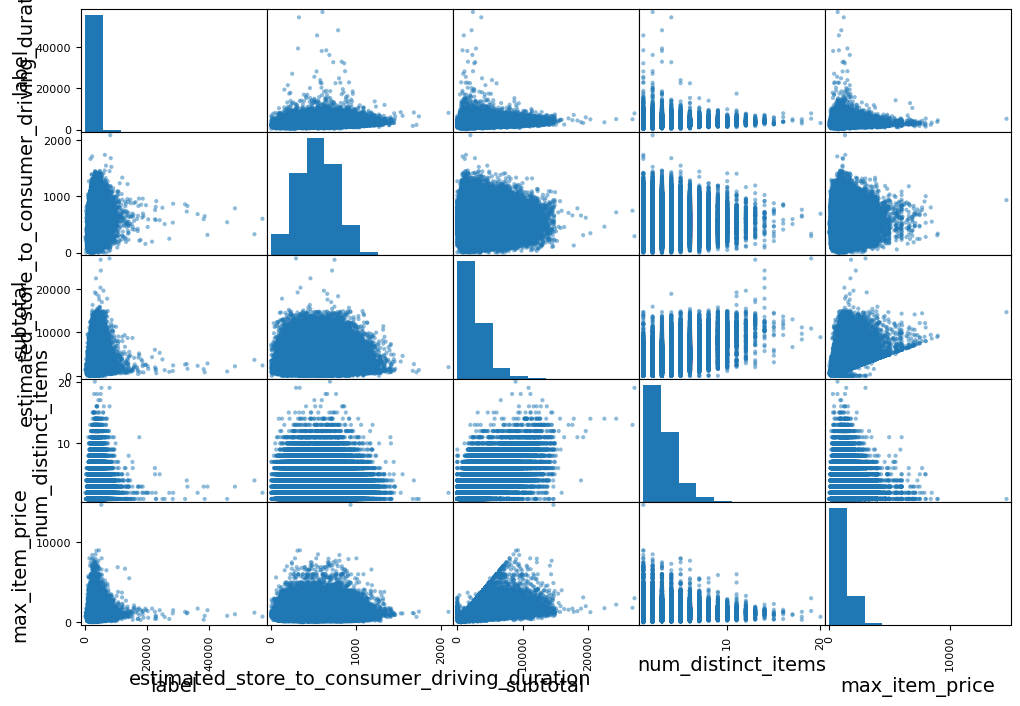

In [129]:
from pandas.plotting import scatter_matrix

some_columns = df_corr['label'][:5].index

scatter_matrix(numeric_df[some_columns], figsize=(12, 8))
save_fig('scatter_matrix_plot')

## 결론

- Null value handling
  - `actual_delivery_time` : null 값 제거 및 레이블링에 사용 후 drop
  - `market_id` : mode
  - `order_protocol` : mode
  - `store_primary_category` : other 
  - `total_onshift` : mean
  - `total_busy` : mean
  - `total_outstanding_orders` : mean
  - `estimated_store_to_consumer_driving_duration`: mean
- Cleaning
  - 제거
    - `label` : >= 60000 제거
    - `total_items` : >= 400 제거
    - `max_item_price` >= 10000 제거
  - 변경
    - `total_outstanding_orders` : < 0 -> 0
    - `min_item_price` : < 0 -> 0
    - `total_outstanding_orders` : < 0 -> 0
- Extra Column
  - `onshift` = `total_onshift` - `total_busy` 값 중 음의 값을 0으로 만들어 학습에 사용
  - `created_at` : 시간대를 범주형 데이터 (19 ~ 1], (1 ~ 5] (5 ~ 19]

- Numeric Columns
  - `total_items`
  - `subtotal`
  - `num_distint_item`
  - `min_item_price`
  - `max_item_price`
  - `total_outstanding_orders`
  - `estimated_store_to_consumer_driving_duration`
  - `onshift`
- Category Columns
  - `market_id`
  - `order_protocol`
  - `created_at` : one-hot encoding
  - `store_primary_category` : ordinal encoding
  - 
- **DROP COLUMNS**
  - `total_onshift`, `total_busy`, `store_id`, `actual_delivery_time`, `estimated_order_place_duration`